In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [104]:
key = 'neratinib'
df = pd.read_csv(f'/home/amansinha/extractpubmed/papers/key_meta_all/{key}_metadf2.csv')
df['keywords'] = df['keywords'].str.strip('[]').str.split(',')
df['keywords'] = df['keywords'].apply(lambda x: [xx.strip().strip("''") for xx in x])
df['year'] = df['publication_date'].apply(lambda x: x.split('-')[0])
df

,pubmed_id,title,keywords,publication_date,abstract,year
0,34034468,[Application of neratinib in the treatment of ...,"[Breast neoplasms, Hormone receptor, Human epi...",2021-05-27,"Hormone receptor (HR), human epidermal growth ...",2021
1,34028126,Efficacy of Neratinib Plus Capecitabine in the...,"[Capecitabine, Central nervous system neoplasm...",2021-05-25,Neratinib has efficacy in central nervous syst...,2021
2,34016991,HER2-positive breast cancer and tyrosine kinas...,[],2021-05-22,Human epidermal growth factor receptor 2 (HER2...,2021
3,34012912,Efficacy and Safety of Pyrotinib Versus T-DM1 ...,"[human epidermal growth factor, metastatic bre...",2021-05-21,To compare the efficacy and safety between pyr...,2021
4,33971386,Neratinib as extended adjuvant therapy in pati...,"[Breast cancer, Copositive, Extended adjuvant ...",2021-05-11,Neratinib is approved in the European Union fo...,2021
...,...,...,...,...,...,...
429,16730237,The impact of human EGFR kinase domain mutatio...,[],2006-05-30,To understand the role of human epidermal grow...,2006
430,16672372,Epidermal growth factor receptor variant III m...,[],2006-05-05,The tyrosine kinase inhibitors gefitinib (Ires...,2006
431,15897464,Irreversible inhibitors of the EGF receptor ma...,[],2005-05-18,Non-small cell lung cancers (NSCLCs) with acti...,2005
432,15715478,"Optimization of 6,7-disubstituted-4-(arylamino...",[],2005-02-18,"A series of new 6,7-disubstituted-4-(arylamino...",2005


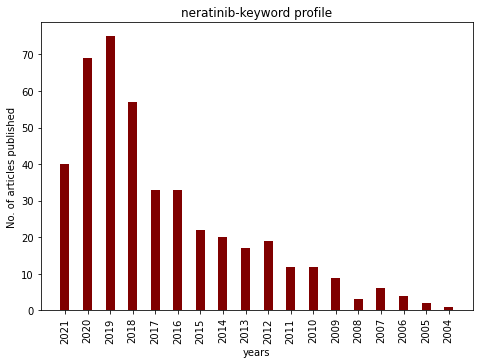

In [110]:
# distribution of papers across year - extracted 5K (old collection)

yearfreq = dict()
for d in df['year']:
    if d not in yearfreq:
        yearfreq[d] = 1
    else:
        yearfreq[d] +=1


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
years = list(yearfreq.keys())
count = list(yearfreq.values())
plt.bar(years, count, color ='maroon',width = 0.4)
 
plt.xlabel("years")
plt.ylabel("No. of articles published")
plt.title(f"{key}-keyword profile")
plt.xticks(rotation='vertical')
plt.show()

## Getting embeddings & dim-reduction

In [83]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import re
import time

from mpl_toolkits.mplot3d import Axes3D
from sentence_transformers import SentenceTransformer, util

In [89]:
# https://stackoverflow.com/questions/43727583/re-sub-erroring-with-expected-string-or-bytes-like-object
# remove float to have string
df['title_processed'] = df['title'].apply(lambda x: re.sub("(\\d|\\W)+"," ",str(x)))

In [91]:
model = SentenceTransformer('allenai-specter')

paper_texts = [paper for paper in df['title_processed']]
corpus_embeddings = model.encode(paper_texts, convert_to_tensor=True)

pca2 = PCA(n_components=2)
print(corpus_embeddings.shape)

all_together_reduced = pca2.fit_transform(corpus_embeddings.numpy())

## Plotting

In [102]:
# after dimension reduction
#random_coordinates = np.random.rand(434,2)

cdf = pd.DataFrame()
cdf['year'] = df['year'].apply(lambda x: int(x))
cdf['x'] = all_together_reduced[:,0]
cdf['y'] = all_together_reduced[:,1]
cdf

,year,x,y
0,2021,-6.321929,2.639246
1,2021,-3.723450,5.553467
2,2021,-3.222524,-2.008277
3,2021,-1.554270,0.007207
4,2021,-3.859797,-1.651925
...,...,...,...
429,2006,2.539570,-2.453372
430,2006,2.010403,-2.987875
431,2005,0.426928,6.616590
432,2005,7.287726,3.583497


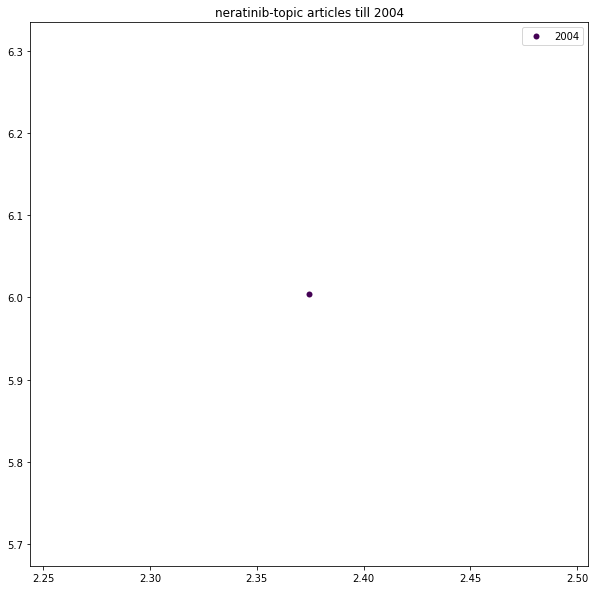

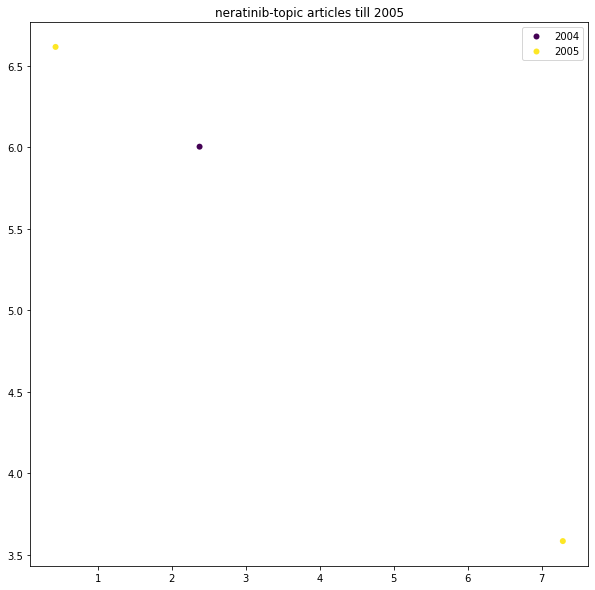

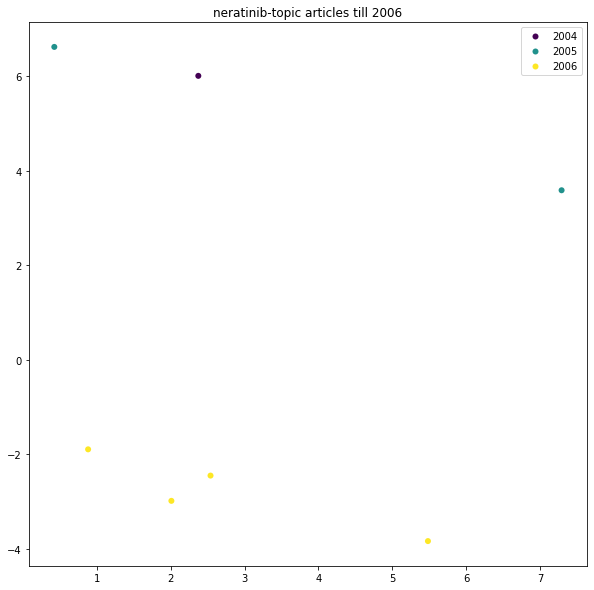

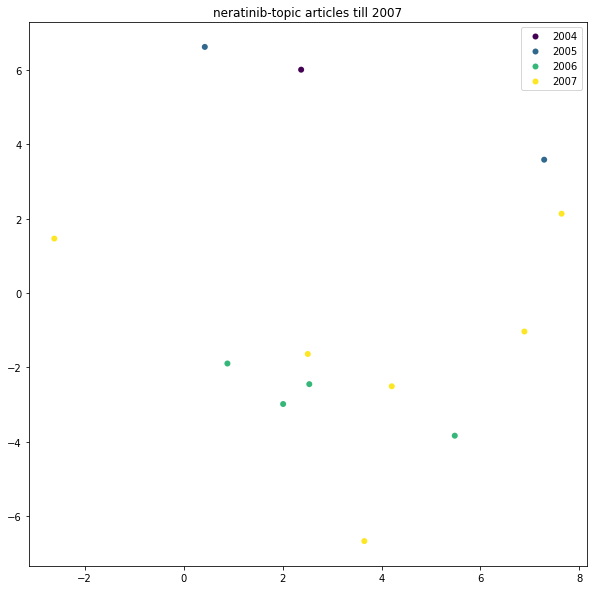

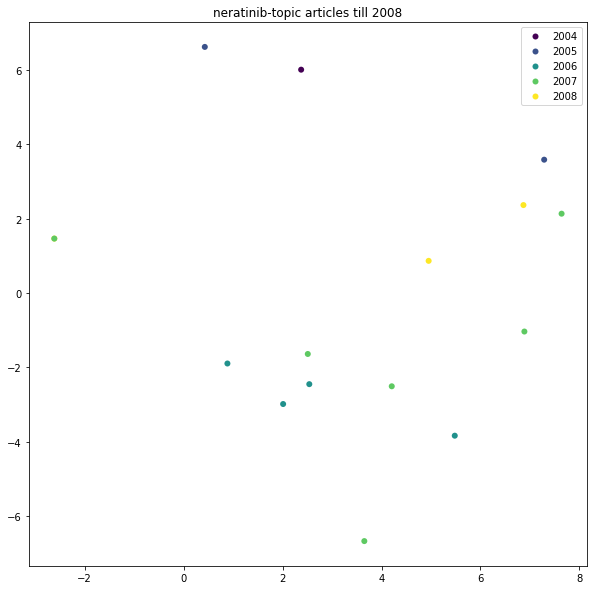

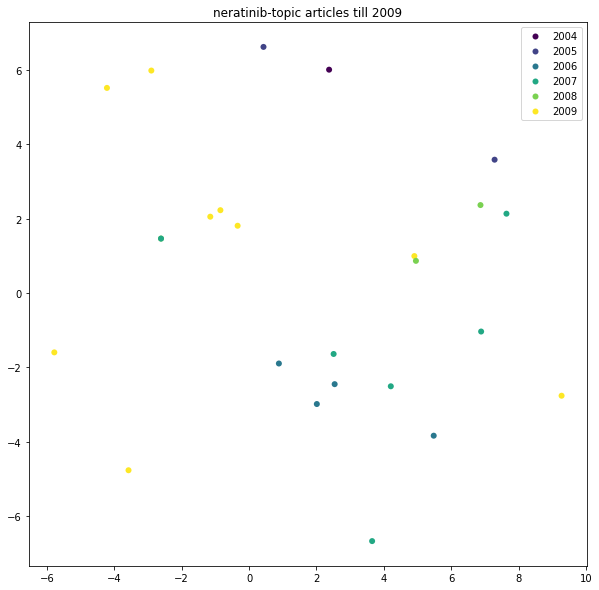

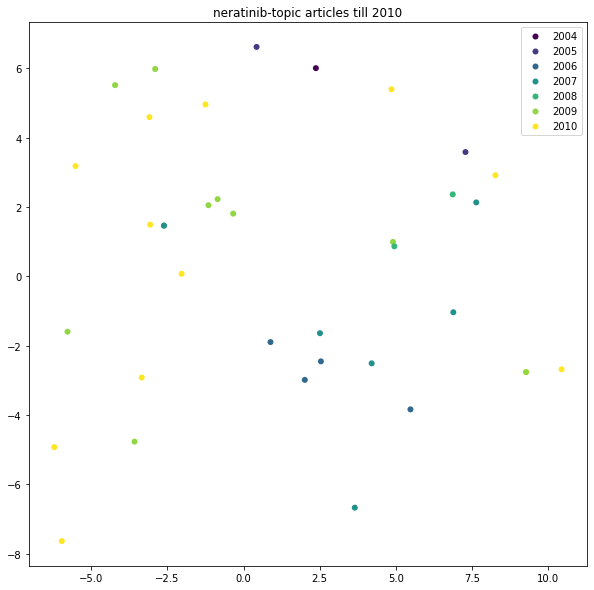

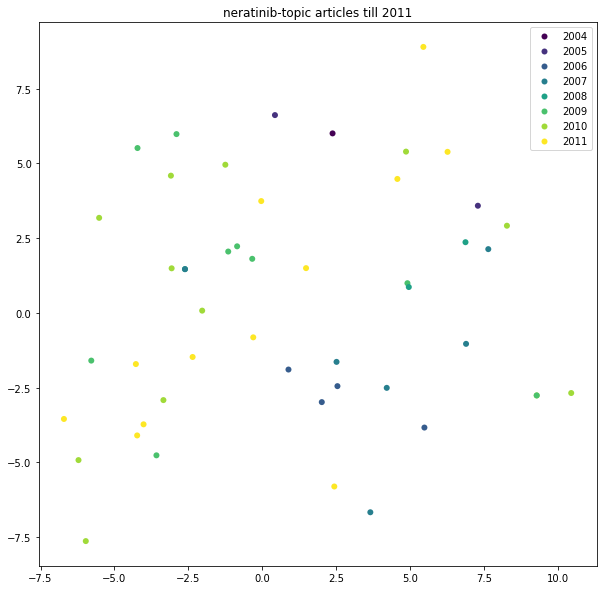

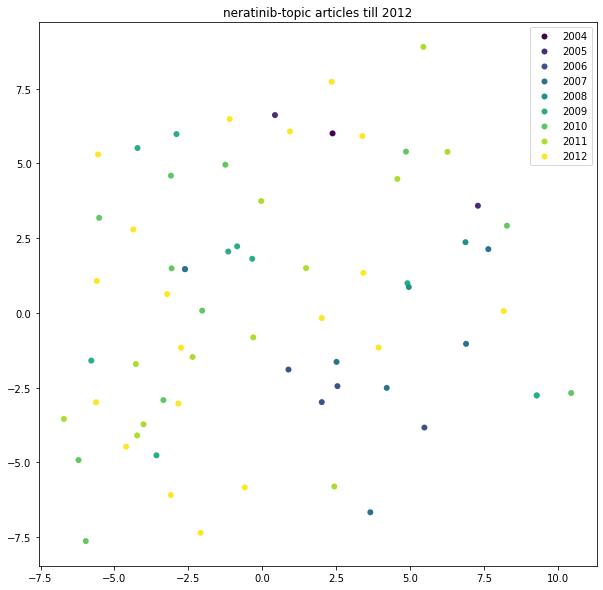

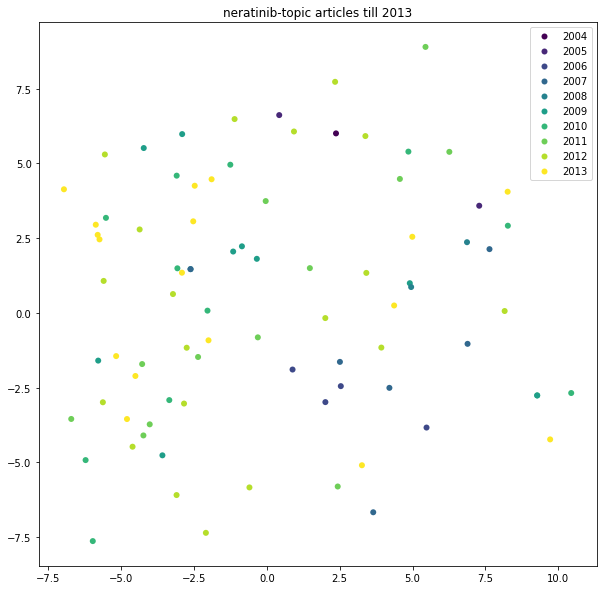

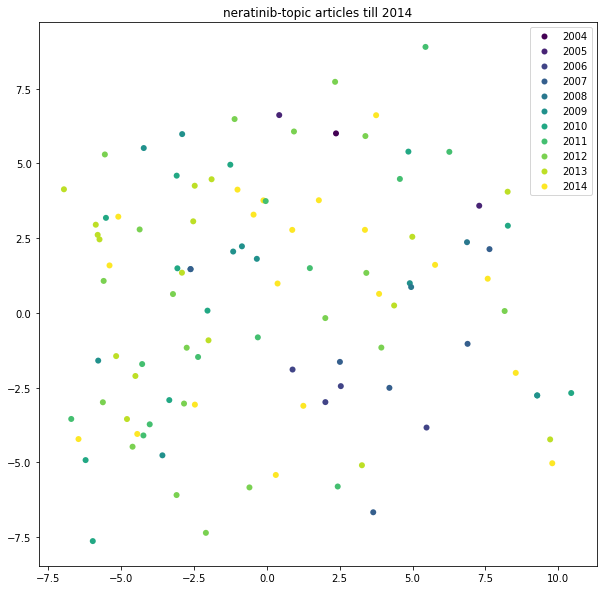

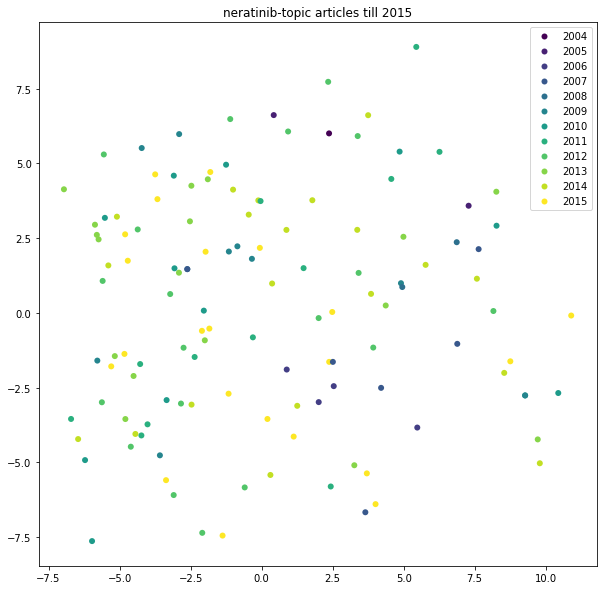

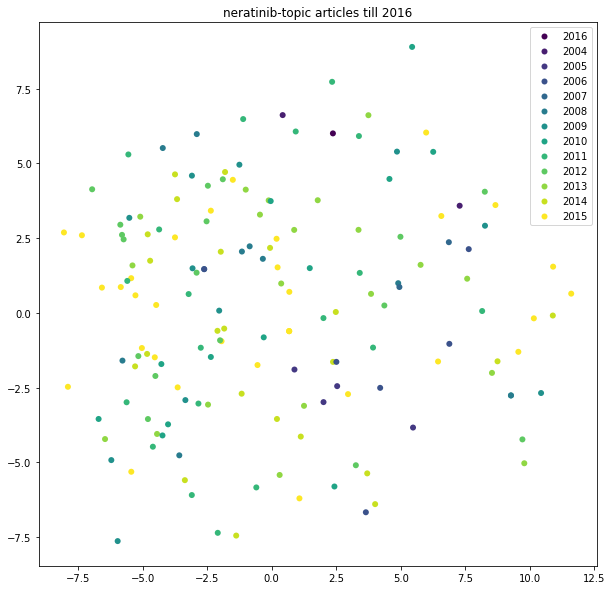

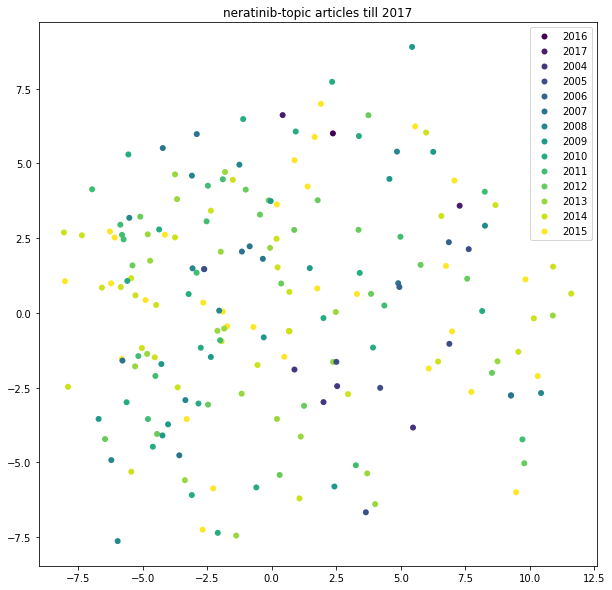

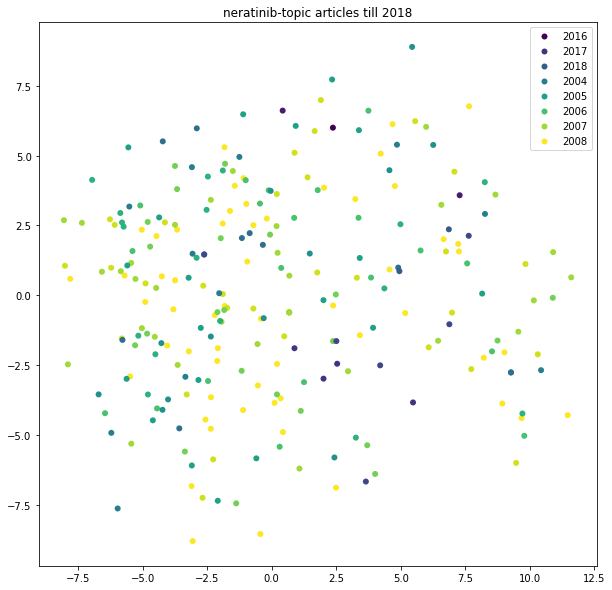

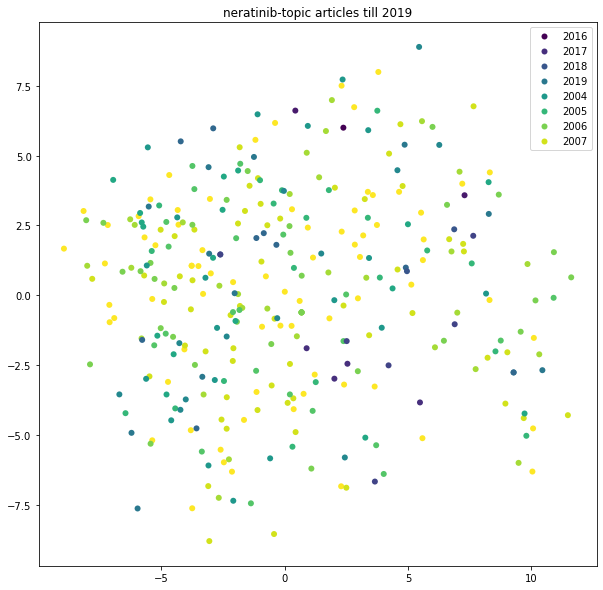

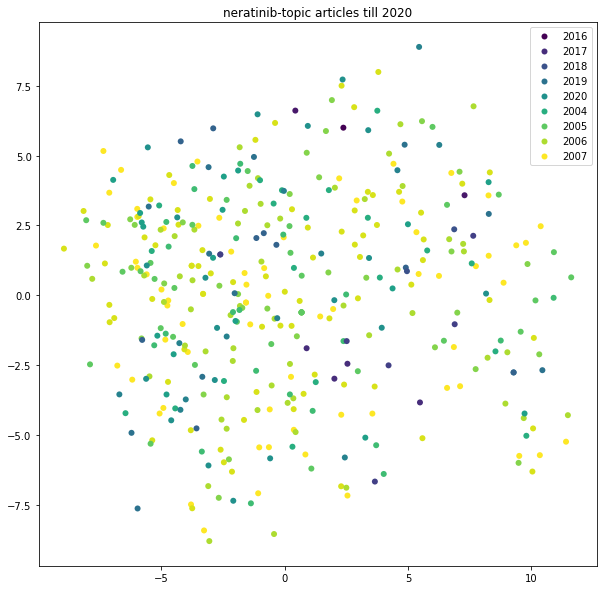

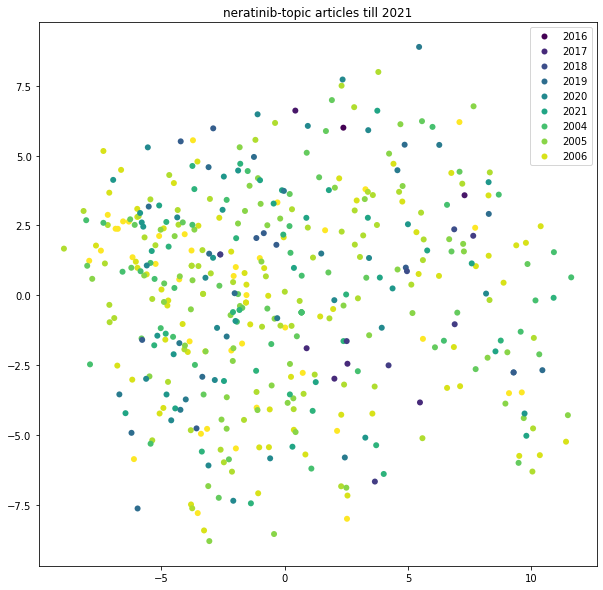

In [108]:
includeyear = []
for y in sorted(set(cdf['year'])):
    includeyear.append(y)
    #print(includeyear)
    current = cdf[cdf.year.isin(includeyear)].copy()
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    # plot x,y data with c as the color vector, set the line width of the markers to 0
    sc = plt.scatter(current['x'], current['y'], c=current['year'], lw=0, )
    l = set(current['year'])
    plt.legend(handles=sc.legend_elements()[0], labels=l)
    plt.title(f'{key}-topic articles till {max(l)}')